ICP Assignment 9

## Autoencoders

In [ ]:
## 1. Add one more hidden layer to autoencoder## 

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# input layer
input_img = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(256, activation='relu')(input_img)
encode_layer2 = Dense(128, activation='relu')(encode_layer1)
encode_layer3 = Dense(64, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(32, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(64, activation='relu')(latent_view)
decode_layer2 = Dense(128, activation='relu')(decode_layer1)
decode_layer3 = Dense(128, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_img, output_layer)

In [2]:
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

history=model.fit(x_train, x_train,epochs=10,batch_size=256, shuffle=True,validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 4s 10ms/step - loss: 0.0525 - accuracy: 0.0077 - val_loss: 0.0286 - val_accuracy: 0.0139
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0256 - accuracy: 0.0122 - val_loss: 0.0240 - val_accuracy: 0.0146
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0229 - accuracy: 0.0132 - val_loss: 0.0221 - val_accuracy: 0.0186
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0211 - accuracy: 0.0140 - val_loss: 0.0204 - val_accuracy: 0.0146
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0199 - accuracy: 0.0145 - val_loss: 0.0193 - val_accuracy: 0.0146
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0188 - accuracy: 0.0144 - val_loss: 0.0184 - val_accuracy: 0.0125
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0180 - accuracy: 0.0156 - val_loss: 0.0180 - val_accuracy: 0.0162
Epoch

In [4]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
## 2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data. 
## Also, visualize the same test data before reconstruction using Matplotlib

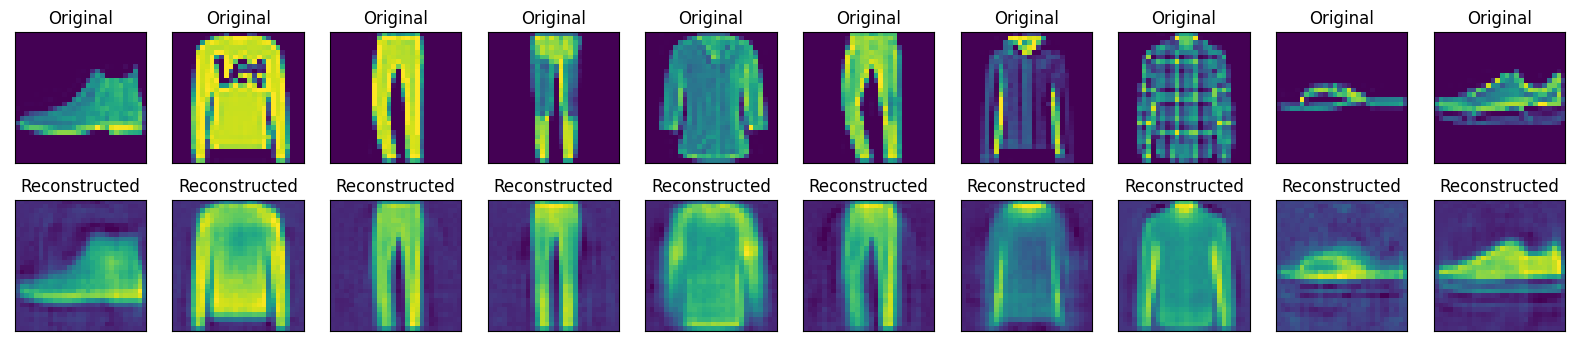

In [5]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
## 3. Repeat the question 2 on the denoisening autoencoder
## 4. plot loss and accuracy using the history object

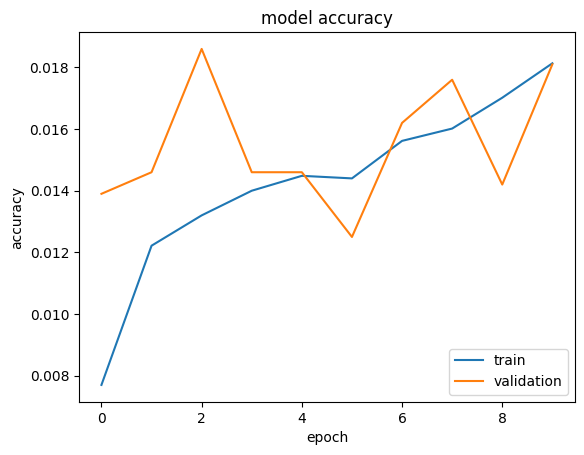

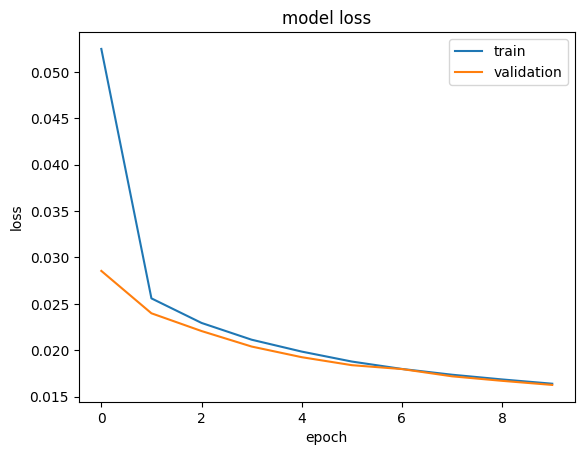

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## DenAutoencoderoisening 

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

# input layer
input_img = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(256, activation='relu')(input_img)
encode_layer2 = Dense(128, activation='relu')(encode_layer1)
encode_layer3 = Dense(64, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(32, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(64, activation='relu')(latent_view)
decode_layer2 = Dense(128, activation='relu')(decode_layer1)
decode_layer3 = Dense(128, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_img, output_layer)


In [8]:
model.compile(optimizer='adadelta', loss='mse',metrics=['accuracy'])

from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [9]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

history=model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 [==============================] - 4s 10ms/step - loss: 0.0514 - accuracy: 0.0069 - val_loss: 0.0304 - val_accuracy: 0.0099
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0271 - accuracy: 0.0126 - val_loss: 0.0259 - val_accuracy: 0.0140
Epoch 3/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0246 - accuracy: 0.0132 - val_loss: 0.0242 - val_accuracy: 0.0128
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0231 - accuracy: 0.0141 - val_loss: 0.0229 - val_accuracy: 0.0160
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0220 - accuracy: 0.0147 - val_loss: 0.0219 - val_accuracy: 0.0158
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0212 - accuracy: 0.0157 - val_loss: 0.0214 - val_accuracy: 0.0145
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0206 - accuracy: 0.0164 - val_loss: 0.0210 - val_accuracy: 0.0161


In [10]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


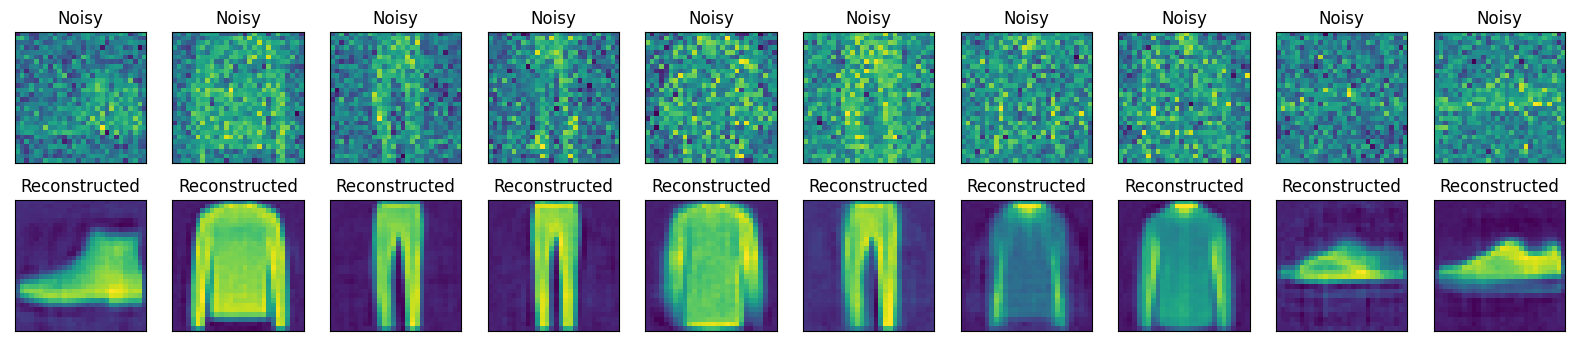

In [11]:

import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title("Noisy")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

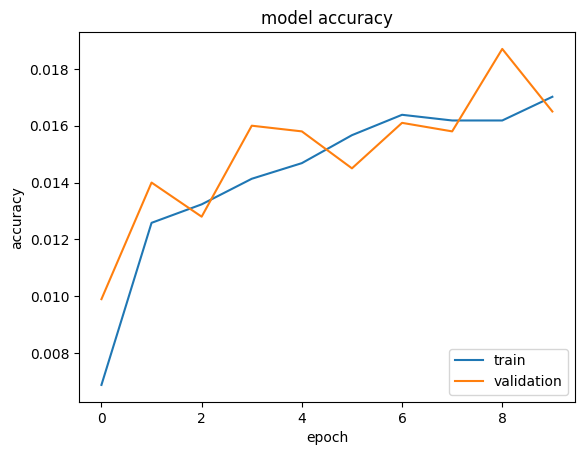

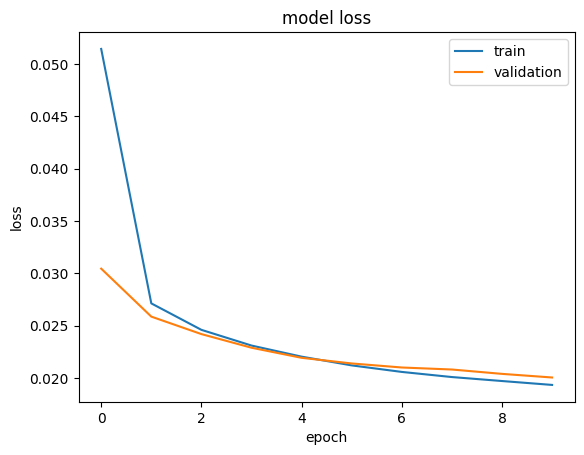

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()